## Project on Market Basket Analysis of a Bakery Dataset

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/sumit/Sumit DATA/Datasets/Project/BreadBasket_DMS.csv')

In [3]:
df.head()

,Date,Time,Transaction,Item
0,30-10-2016,09:58:11,1,Bread
1,30-10-2016,10:05:34,2,Scandinavian
2,30-10-2016,10:05:34,2,Scandinavian
3,30-10-2016,10:07:57,3,Hot chocolate
4,30-10-2016,10:07:57,3,Jam


In [4]:
df.shape

(21293, 4)

### Removing 'NONE' from Item columns.

In [5]:
def unused(x):
    if x == 'NONE':
        return np.nan
    else:
        return x
    

In [6]:
df['Item'] = df['Item'].apply(unused)
df.dropna(inplace=True)

### This are the unique Items of the bakery shop.

In [7]:
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [8]:
df.shape

(20507, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


### There is no null values in the dataset.

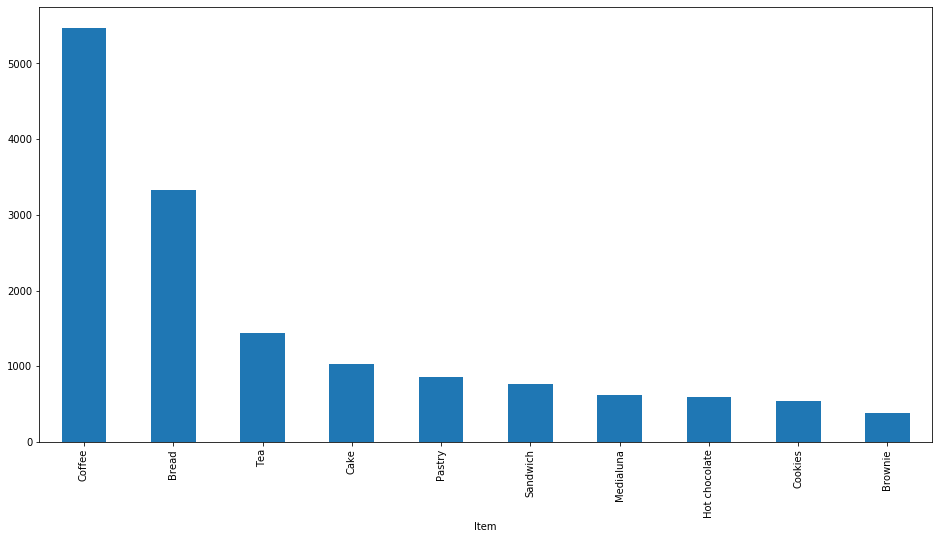

In [10]:
plt.figure(figsize=(16,8))
df.groupby('Item').count()['Transaction'].nlargest(10).plot('bar')
plt.show()

## Inference:

These are the Top 10 most sold products on the bakery shop. The Sales of Coffee is the highest in this bakery followed with bread,Tea,etc. 

In [11]:
def encode(x):
    if x>0:
        return 1
    else:
        return 0

In [12]:
df['Value'] = 1

In [13]:
df1 = pd.pivot_table(data = df, values='Value', index = 'Transaction', columns='Item', aggfunc='sum',fill_value=0)

In [14]:
df1 = df1.applymap(encode)

In [15]:
df1

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using Apriori Algorithm to get the recommendations.

In [16]:
frequent_itemsets = apriori(df1,min_support=0.01,use_colnames=True)
frequent_itemsets.sort_values(by = 'support',ascending = False).head(10)

,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Coffee, Bread)"
19,0.086107,(Pastry)
21,0.071844,(Sandwich)
16,0.061807,(Medialuna)
12,0.058320,(Hot chocolate)
42,0.054728,"(Cake, Coffee)"


## Inference:

These are the combination of the products whose support value is greater than the threshold support value.

In [17]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=0.1)
rules.sort_values(by = ['lift','confidence'],ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
70,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
71,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
27,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
26,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
29,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
...,...,...,...,...,...,...,...,...,...
21,(Bread),(Tea),0.327205,0.142631,0.028104,0.085890,0.602181,-0.018566,0.937927
9,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
8,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
56,"(Cake, Coffee)",(Bread),0.054728,0.327205,0.010037,0.183398,0.560497,-0.007870,0.823895


In [18]:
print(rules['lift'].max())
print(rules['confidence'].max())

1.9379773953825197
0.7044025157232704


### Keeping a Threshold for the Products whose Lift value = 1.5 and Confidance value = 0.5

In [19]:
recommed = rules[(rules['lift']>1.5) | (rules['confidence']>0.5)]

In [20]:
recommed = recommed.sort_values(by = ['lift','confidence'],ascending=False)
recommed.reset_index(inplace = True, drop = True)

In [21]:
recommed

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
1,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
2,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
3,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
7,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
8,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682


## Conclusion of this project

Above Products are the best combination of products according to the best Lift and Confidence Value. The threshold for Lift and Confidence is 50% and 1.5 respectively.<br/>
The Recommendation for the above store are as follows :-

**1.** We can give an offer of 10-20% off on bigger pack of cakes if a customer buys both Coffee and Tea and we can keep all the stuffs together as well.

**2.** We can keep Hot Chocolate and Cake together so that the sales of both the products will be more.

**3.** From Product 6 to 16, we can keep this products far away from Coffee so that if a customer takes that antecedent product so if he needs coffee then he/she has to travel to the extreme end to take coffee. So the Idea behind this is if customer travels to extreme end so he/she can see other products while going towards Coffee section.